In [2]:
%load_ext autoreload
%autoreload 2

import os
import os.path as osp
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

sys.path.append("../src")

from plot_utils import process_results, execute_df_rollout
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

api = wandb.Api(
    overrides={"entity": "kobybibas", "project": "pnml_for_active_learning"}
)
out_dir = "../output/analysis"
os.makedirs(out_dir, exist_ok=True)

# Project is specified by
runs = api.runs("kobybibas/pnml_for_active_learning")


In [3]:
! wandb login

wandb: Currently logged in as: kobybibas. Use `wandb login --relogin` to force relogin


In [4]:
random_runs = [
    'kobybibas/pnml_for_active_learning/2ego13ig',
    'kobybibas/pnml_for_active_learning/rg4sqy5h'
]
bald_runs = [
    'kobybibas/pnml_for_active_learning/pysfz64s',
    'kobybibas/pnml_for_active_learning/2ch57n8z',
    'kobybibas/pnml_for_active_learning/38i91s0p',
    'kobybibas/pnml_for_active_learning/j1ue5rdz'
]
pnml_runs = [
    'kobybibas/pnml_for_active_learning/2xpm68hm',
    'kobybibas/pnml_for_active_learning/1wdvyguw',
    'kobybibas/pnml_for_active_learning/19awk80d',
    'kobybibas/pnml_for_active_learning/ozujthib',
    'kobybibas/pnml_for_active_learning/2ipwg137',
    'kobybibas/pnml_for_active_learning/2v0ile3m'
]

random_dfs = process_results(api=api,run_list=random_runs)
bald_dfs = process_results(api=api,run_list=bald_runs)
pnml_dfs = process_results(api=api,run_list=pnml_runs)

kobybibas/pnml_for_active_learning/2ego13ig
kobybibas/pnml_for_active_learning/rg4sqy5h
kobybibas/pnml_for_active_learning/pysfz64s
kobybibas/pnml_for_active_learning/2ch57n8z
kobybibas/pnml_for_active_learning/38i91s0p
kobybibas/pnml_for_active_learning/j1ue5rdz
kobybibas/pnml_for_active_learning/2xpm68hm
kobybibas/pnml_for_active_learning/1wdvyguw
kobybibas/pnml_for_active_learning/19awk80d
kobybibas/pnml_for_active_learning/ozujthib
kobybibas/pnml_for_active_learning/2ipwg137
kobybibas/pnml_for_active_learning/2v0ile3m


In [13]:
rolling_size = 5
random_res = execute_df_rollout(random_dfs,rolling_size=rolling_size)
bald_res = execute_df_rollout(bald_dfs,rolling_size=rolling_size)
pnml_res = execute_df_rollout(pnml_dfs,rolling_size=rolling_size)


CIFAR10 OOD


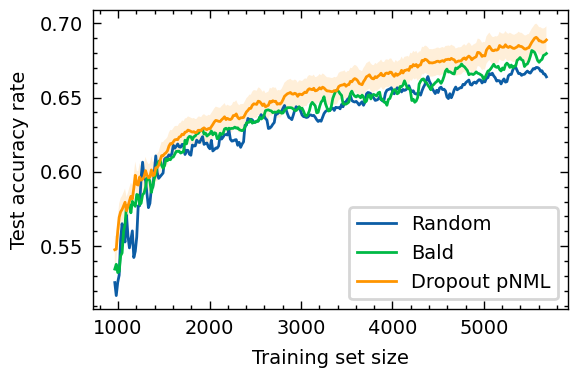

In [14]:
plt.style.use(["science", "nature",'no-latex'])
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 2))

for i, (res, name) in enumerate(
    ([(random_res, "Random"), (bald_res, "Bald"), (pnml_res, "Dropout pNML")])
):
    ax.plot(res["mean"], label=name, color=f"C{i}")
    ax.fill_between(
        res["low"].index,
        res["low"].values,
        res["high"].values,
        facecolor=f"C{i}",
        alpha=0.15,
    )
ax.set_ylabel("Test accuracy rate")
ax.set_xlabel(f"Training set size")
ax.legend(frameon=True)
# ax.set_ylim(0.65, 1)
# ax.set_xlim(20, 320)
print("CIFAR10 OOD")
plt.tight_layout()
plt.savefig(osp.join(out_dir, "cifar10_ood.pdf"))
plt.show()

In [12]:
len(random_res)

3